In [1526]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import missingno as msno

In [1527]:
# Chargement des données
ins_prof_dut = pd.read_csv("../csv/fr-esr-insertion_professionnelle-dut_donnees_nationales.csv", sep=";")
ins_prof_lp = pd.read_csv("../csv//fr-esr-insertion_professionnelle-lp_donnees_nationales.csv", sep=";")
ins_prof_master = pd.read_csv("../csv/fr-esr-insertion_professionnelle-master_donnees_nationales.csv", sep=";")
ins_prof_doctorat = pd.read_csv("../csv/fr-esr-insertion-professionnelle-doctorat-par-discipline.csv", sep=";")

In [1528]:
ins_prof_dut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 75 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Année                                                                  1128 non-null   object 
 1   Diplôme                                                                1128 non-null   object 
 2   situation                                                              1128 non-null   object 
 3   Genre                                                                  1128 non-null   object 
 4   Disciplines                                                            1128 non-null   object 
 5   Code du domaine                                                        1128 non-null   object 
 6   Domaine                                                                1128 non-null   o

1. Etude de l'insertion professonnelle des DUT, licences pro et Master 

In [1529]:
# Agrégation de toutes les formations (DUT, LP, MASTER)
ins_prof = pd.concat([ins_prof_dut, ins_prof_lp, ins_prof_master], keys=["D", "L", "M"])

In [1530]:
ins_prof.head()

Année Diplôme                 situation             Genre  \
D 0  2013     DUT  30 mois après le diplôme            hommes   
  1  2017     DUT  18 mois après le diplôme  femmes et hommes   
  2  2017     DUT  18 mois après le diplôme            hommes   
  3  2017     DUT  18 mois après le diplôme  femmes et hommes   
  4  2017     DUT  18 mois après le diplôme            femmes   

                                           Disciplines Code du domaine  \
D 0  Droit, économie et gestion>Droit>Carrières jur...             DEG   
  1  Sciences, technologies et santé>Informatique>I...             STS   
  2  Sciences, technologies et santé>Informatique>I...             STS   
  3  Sciences humaines et sociales>Information comm...             SHS   
  4  Sciences humaines et sociales>Information comm...             SHS   

                             Domaine Code de la discipline  \
D 0       Droit, économie et gestion                disc02   
  1  Sciences, technologies et santé                disc16   
  2  Sciences, technologies et santé                disc16   
  3    Sciences humaines et sociales                disc10   
  4    Sciences humaines et sociales                disc10   

                    Discipline Sigle  ... Secteur disciplinaire  \
D 0                      Droit   NaN  ...                   NaN   
  1               Informatique   NaN  ...                   NaN   
  2               Informatique   NaN  ...                   NaN   
  3  Information communication   NaN  ...                   NaN   
  4  Information communication   NaN  ...                   NaN   

     Administration publique (hors ens.)  \
D 0                                  NaN   
  1                                  NaN   
  2                                  NaN   
  3                                  NaN   
  4                                  NaN   

    Prof. libérale, indépendant, chef d’entreprise  \
D 0                                            NaN   
  1                                            NaN   
  2                                            NaN   
  3                                            NaN   
  4                                            NaN   

    Contrat de professionnalisation  \
D 0                             NaN   
  1                             NaN   
  2                             NaN   
  3                             NaN   
  4                             NaN   

    La fonction publique (d'etat, territoriale ou hospitalière)  \
D 0                                                NaN            
  1                                                NaN            
  2                                                NaN            
  3                                                NaN            
  4                                                NaN            

    Organisation internationale ou une institution de l'Union européenne  \
D 0                                                NaN                     
  1                                                NaN                     
  2                                                NaN                     
  3                                                NaN                     
  4                                                NaN                     

    Société d'économie mixte Agriculture, sylviculture et pêche  \
D 0                      NaN                                NaN   
  1                      NaN                                NaN   
  2                      NaN                                NaN   
  3                      NaN                                NaN   
  4                      NaN                                NaN   

    Artisan, commerçant, chef d'entreprise  \
D 0                                    NaN   
  1                                    NaN   
  2                                    NaN   
  3                                    NaN   
  4                                    NaN   

    Ingénieur, cadre, prof.

In [1531]:
# Liste des variables pour les DUT, Licences et Masters
ins_prof.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5920 entries, ('D', 0) to ('M', 2924)
Data columns (total 86 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Année                                                                  5920 non-null   object 
 1   Diplôme                                                                5920 non-null   object 
 2   situation                                                              5920 non-null   object 
 3   Genre                                                                  5920 non-null   object 
 4   Disciplines                                                            5920 non-null   object 
 5   Code du domaine                                                        5920 non-null   object 
 6   Domaine                                                                592

In [1532]:
# Listes des variables pour les doctorants
ins_prof_doctorat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 21 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Année d’obtention                                                                240 non-null    int64  
 1   Diplôme                                                                          240 non-null    object 
 2   Situation                                                                        240 non-null    object 
 3   Discipline principale agrégée                                                    240 non-null    object 
 4   Discipline principale                                                            240 non-null    object 
 5   Genre                                                                            240 non-null    object 
 6   Nombre de 

In [1533]:
ins_prof.reset_index(inplace=True)

In [1534]:
ins_prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 88 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   level_0                                                                5920 non-null   object 
 1   level_1                                                                5920 non-null   int64  
 2   Année                                                                  5920 non-null   object 
 3   Diplôme                                                                5920 non-null   object 
 4   situation                                                              5920 non-null   object 
 5   Genre                                                                  5920 non-null   object 
 6   Disciplines                                                            5920 non-null   o

In [1535]:
ins_prof.drop("level_1", axis=1, inplace=True)
ins_prof.rename(columns={"level_0": "label"}, inplace=True)

In [1536]:
ins_prof["Diplôme"].unique()

array(['DUT', 'LICENCE PRO', 'MASTER LMD', 'MASTER ENS'], dtype=object)

In [1537]:
ins_prof.head()

,label,Année,Diplôme,situation,Genre,Disciplines,Code du domaine,Domaine,Code de la discipline,Discipline,...,Secteur disciplinaire,Administration publique (hors ens.),"Prof. libérale, indépendant, chef d’entreprise",Contrat de professionnalisation,"La fonction publique (d'etat, territoriale ou hospitalière)",Organisation internationale ou une institution de l'Union européenne,Société d'économie mixte,"Agriculture, sylviculture et pêche","Artisan, commerçant, chef d'entreprise","Ingénieur, cadre, prof. libérales, prof. intellectuelles sup"
0,D,2013,DUT,30 mois après le diplôme,hommes,"Droit, économie et gestion>Droit>Carrières jur...",DEG,"Droit, économie et gestion",disc02,Droit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D,2017,DUT,18 mois après le diplôme,femmes et hommes,"Sciences, technologies et santé>Informatique>I...",STS,"Sciences, technologies et santé",disc16,Informatique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D,2017,DUT,18 mois après le diplôme,hommes,"Sciences, technologies et santé>Informatique>I...",STS,"Sciences, technologies et santé",disc16,Informatique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,2017,DUT,18 mois après le diplôme,femmes et hommes,Sciences humaines et sociales>Information comm...,SHS,Sciences humaines et sociales,disc10,Information communication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D,2017,DUT,18 mois après le diplôme,femmes,Sciences humaines et sociales>Information comm...,SHS,Sciences humaines et sociales,disc10,Information communication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1538]:
ins_prof[ins_prof["label"] == "D"]["Année"].unique()

array(['2013', '2017', '2014', '2019', "'2019", '2015', '2016', "'2013",
       "'2014", "'2015", "'2017", "'2016"], dtype=object)

In [1539]:
# Liste des codes du domaine des diplômes
ins_prof["Code du domaine"].unique()

array(['DEG', 'STS', 'SHS', 'ALL', 'LLA', 'MEEF'], dtype=object)

In [1540]:
# Délais d'insertion après diplôme
ins_prof["situation"].unique()

array(['30 mois après le diplôme', '18 mois après le diplôme'],
      dtype=object)

In [1541]:
# Sélection des secteurs
df_secteur = ins_prof.iloc[:, 32:]

# Suppression du "secteur disciplinaire"
df_secteur = df_secteur.drop(["Secteur disciplinaire", "Code du secteur disciplinaire"], axis=1)

# suppression des valeurs non numériques pour chaque variable de secteur
for col in df_secteur.columns:
    df_secteur[col] = df_secteur[col].str.extract(r"(\d+)")

In [1542]:
# Ajout de l'indication de l'année
df = ins_prof[["Année", "Genre", "Diplôme"]].join(df_secteur)

In [1543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 56 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Année                                                                  5920 non-null   object
 1   Genre                                                                  5920 non-null   object
 2   Diplôme                                                                5920 non-null   object
 3   Fonctionnaire                                                          1291 non-null   object
 4   CDI                                                                    1291 non-null   object
 5   CDI de chantier ou CDI de mission                                      872 non-null    object
 6   Contrat spécifique au doctorat                                         37 non-null     object
 7

In [1544]:
# Recherche des valeurs représentant l'année
df['Année'].unique()

array(['2013', '2017', '2014', '2019', "'2019", '2015', '2016', "'2013",
       "'2014", "'2015", "'2017", "'2016", '2018', "'2018", 2013, 2014,
       2012, 2011, 2019, 2016, 2015, 2018, 2017], dtype=object)

In [1545]:
# Extraction des années afin de supprimer les cotes
df["Année"] = df["Année"].astype(str).str.extract(r"([0-9]{4})")


In [1546]:
# Sélection des contrats
df_contrat = df.iloc[:, 0:15]

In [1547]:
df_contrat.sort_values("Année", inplace=True)

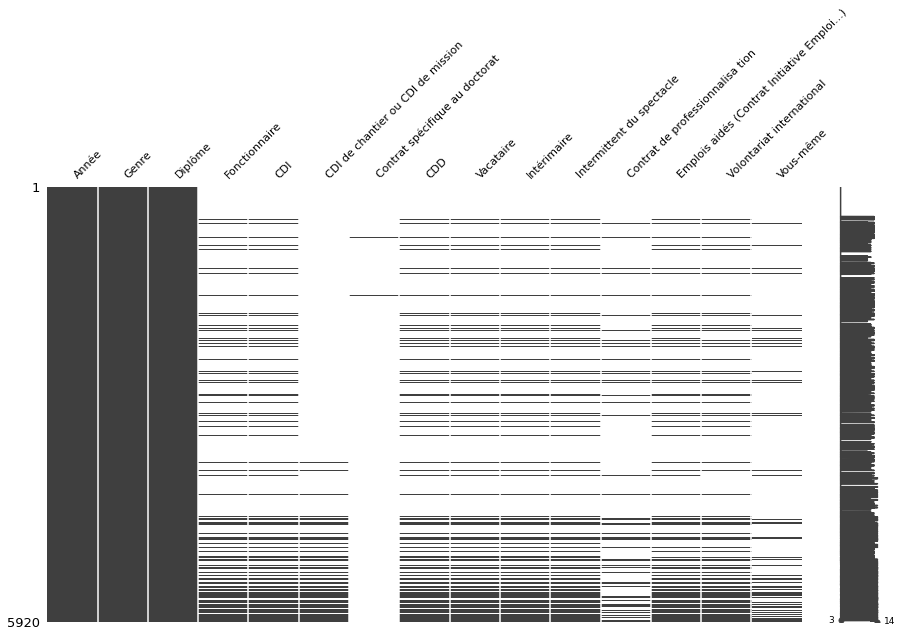

In [1548]:
# Recherche des valeurs manquantes par type de contrats
msno.matrix(df_contrat, fontsize=11, figsize=(15,8))
plt.show()

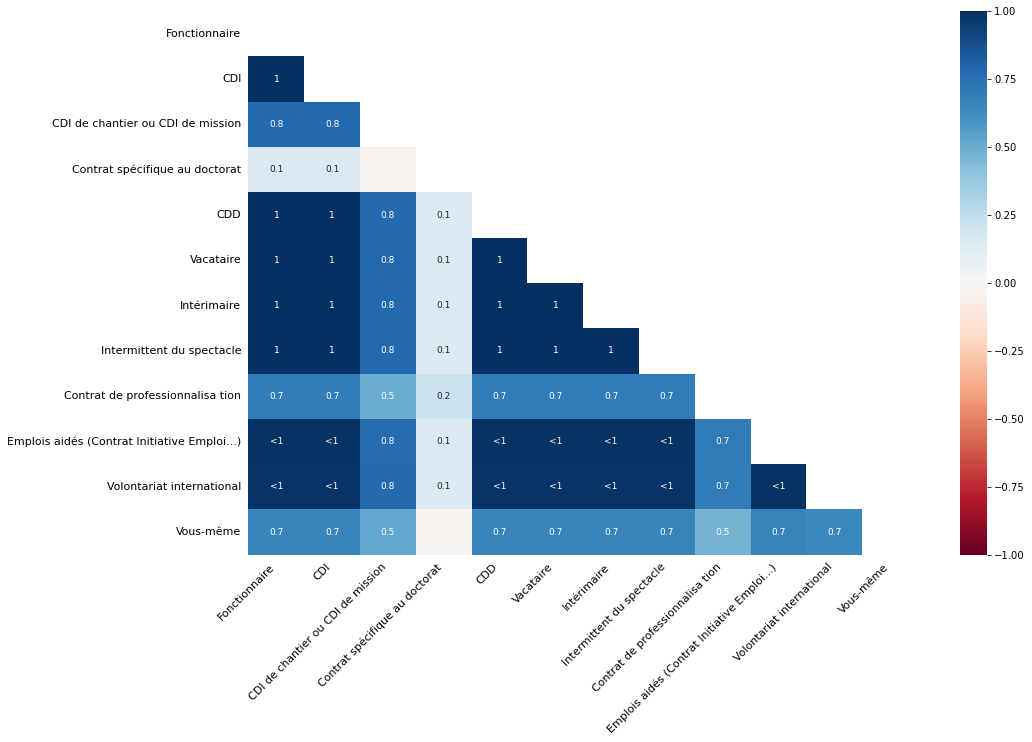

In [1549]:
msno.heatmap(df_contrat, fontsize=11, figsize=(15,10))
plt.show()

In [1550]:
# Remplacement des valeurs manquantes, non significatives ou non communiquées par la valeur 0
df = df.replace([pd.NA, "ns", "nd"], 0)

In [1551]:
# Changement de type pour les variables indiquant des valeurs de type numérique
df["Année"] = df["Année"].astype(int)
df = df.iloc[:, 0:3].join(df.iloc[:, 3:].astype(int))

In [1552]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 56 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Année                                                                  5920 non-null   int64 
 1   Genre                                                                  5920 non-null   object
 2   Diplôme                                                                5920 non-null   object
 3   Fonctionnaire                                                          5920 non-null   int64 
 4   CDI                                                                    5920 non-null   int64 
 5   CDI de chantier ou CDI de mission                                      5920 non-null   int64 
 6   Contrat spécifique au doctorat                                         5920 non-null   int64 
 7

In [1553]:
# Sélection des lignes à valeurs manquantes diplomes + secteurs
rows_na = df[df.iloc[:, 3:].sum(axis=1, numeric_only=True) == 0].index

In [1554]:
# Suppression des lignes diplôme + secteurs dont le nombre est nul. 
df = df.drop(rows_na)

In [1555]:
# renommage de la variable "Contrat de professionnalisa tion"
df.rename(columns={"Contrat de professionnalisa tion": "Contrat de professionnalisation"}, inplace=True)

In [1556]:
df.sort_values("Année", inplace=True)

In [1557]:
# Sélection des contrats
df_contrat = df.iloc[:, 0:15]

In [1558]:
df_contrat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 2948 to 5916
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Année                                       1289 non-null   int64 
 1   Genre                                       1289 non-null   object
 2   Diplôme                                     1289 non-null   object
 3   Fonctionnaire                               1289 non-null   int64 
 4   CDI                                         1289 non-null   int64 
 5   CDI de chantier ou CDI de mission           1289 non-null   int64 
 6   Contrat spécifique au doctorat              1289 non-null   int64 
 7   CDD                                         1289 non-null   int64 
 8   Vacataire                                   1289 non-null   int64 
 9   Intérimaire                                 1289 non-null   int64 
 10  Intermittent du spect

In [1559]:
# Calcul du nombre de chacun des contrats par année 
contrat_count = df_contrat.groupby(["Année", "Diplôme"]).sum()

In [1560]:
contrat_count.reset_index(inplace=True)

In [1561]:
contrat_count.head()

,Année,Diplôme,Fonctionnaire,CDI,CDI de chantier ou CDI de mission,Contrat spécifique au doctorat,CDD,Vacataire,Intérimaire,Intermittent du spectacle,Contrat de professionnalisation,Emplois aidés (Contrat Initiative Emploi…),Volontariat international,Vous-même
0,2013,DUT,117,1286,0,0,597,13,122,6,23,48,2,40
1,2013,LICENCE PRO,139,2184,0,0,881,16,143,29,8,73,1,51
2,2013,MASTER ENS,164,12,0,0,18,2,0,0,0,1,0,0
3,2013,MASTER LMD,202,2020,0,0,1001,45,84,26,0,35,39,68
4,2014,DUT,216,1318,0,0,731,19,141,4,42,43,0,32


In [1562]:
# Nombre total de contrats par année, par diplôme et par type de contrat 
df_contrat_tt = contrat_count.melt(id_vars=["Année", "Diplôme"], value_vars=contrat_count.columns[2:], var_name="contrat", value_name="nb")

In [1563]:
df_contrat_tt.head()

,Année,Diplôme,contrat,nb
0,2013,DUT,Fonctionnaire,117
1,2013,LICENCE PRO,Fonctionnaire,139
2,2013,MASTER ENS,Fonctionnaire,164
3,2013,MASTER LMD,Fonctionnaire,202
4,2014,DUT,Fonctionnaire,216


In [1564]:
# Calcul du nombre de diplômés par année
total_annee = df_contrat_tt.groupby(["Année"])[["nb"]].sum()
total_annee.rename(columns={"nb": "total/année"}, inplace=True)
total_annee.reset_index(inplace=True)

In [1565]:
total_annee

,Année,total/année
0,2013,9496
1,2014,9589
2,2015,9799
3,2016,9819
4,2017,9398
5,2018,19344
6,2019,58583


In [1566]:
# Calcul du nombre de diplômés par type de contrat pour chaque année
df_tt = df_contrat_tt.groupby(["Année", "contrat"])[["nb"]].sum()
df_tt.rename(columns={"nb": "total/contrat"}, inplace=True)
df_tt.reset_index(inplace=True)

In [1567]:
df_tt

,Année,contrat,total/contrat
0,2013,CDD,2497
1,2013,CDI,5502
2,2013,CDI de chantier ou CDI de mission,0
3,2013,Contrat de professionnalisation,31
4,2013,Contrat spécifique au doctorat,0
...,...,...,...
79,2019,Intermittent du spectacle,588
80,2019,Intérimaire,2036
81,2019,Vacataire,398
82,2019,Volontariat international,323


In [1568]:
df_contrat = df_tt.merge(total_annee, on="Année")

In [1569]:
df_contrat

,Année,contrat,total/contrat,total/année
0,2013,CDD,2497,9496
1,2013,CDI,5502,9496
2,2013,CDI de chantier ou CDI de mission,0,9496
3,2013,Contrat de professionnalisation,31,9496
4,2013,Contrat spécifique au doctorat,0,9496
...,...,...,...,...
79,2019,Intermittent du spectacle,588,58583
80,2019,Intérimaire,2036,58583
81,2019,Vacataire,398,58583
82,2019,Volontariat international,323,58583


In [1570]:
# Calcul du pourcentage de diplômés par type de contrat
df_contrat["%"] = round(df_contrat["total/contrat"] / df_contrat["total/année"] * 100, 3)

In [1571]:
df_contrat

,Année,contrat,total/contrat,total/année,%
0,2013,CDD,2497,9496,26.295
1,2013,CDI,5502,9496,57.940
2,2013,CDI de chantier ou CDI de mission,0,9496,0.000
3,2013,Contrat de professionnalisation,31,9496,0.326
4,2013,Contrat spécifique au doctorat,0,9496,0.000
...,...,...,...,...,...
79,2019,Intermittent du spectacle,588,58583,1.004
80,2019,Intérimaire,2036,58583,3.475
81,2019,Vacataire,398,58583,0.679
82,2019,Volontariat international,323,58583,0.551


In [1572]:
df_graph = df_contrat.pivot_table(index=["Année"], values="%", columns="contrat")

In [1573]:
df_graph.head()

contrat,CDD,CDI,CDI de chantier ou CDI de mission,Contrat de professionnalisation,Contrat spécifique au doctorat,Emplois aidés (Contrat Initiative Emploi…),Fonctionnaire,Intermittent du spectacle,Intérimaire,Vacataire,Volontariat international,Vous-même
Année,,,,,,,,,,,,
2013,26.295,57.940,0.000,0.326,0.0,1.653,6.550,0.642,3.675,0.800,0.442,1.674
2014,27.584,56.273,0.000,0.563,0.0,1.470,6.758,0.480,3.984,0.772,0.532,1.585
2015,26.299,58.598,0.000,0.500,0.0,1.419,5.776,0.500,4.174,0.653,0.531,1.551
2016,25.278,60.067,0.000,0.611,0.0,0.713,5.632,0.693,3.839,0.672,0.530,1.966
2017,24.505,61.364,0.319,0.500,0.0,0.128,5.714,0.564,3.384,0.660,0.607,2.256


In [1574]:
# Changement de l'ordre des colonnes selon la valeur maximale de chacune d'entre elles.
col_order = df_graph.max().sort_values().index

In [1575]:
# Calcul de l'écart type par année
errors = df_graph.std(axis=1)

In [1576]:
errors 

Année
2013    17.263951
2014    16.954002
2015    17.447128
2016    17.751027
2017    18.048839
2018    18.671914
2019    17.943101
dtype: float64

In [1577]:
# Axe des ordonnées. Récupération des valeurs de chaque type de contrat depuis un dictionnaire
y = df_graph[col_order].to_dict('list').values()

# Axe des abscisses en année
x = df_graph.index

# Nombre de variables à stacker
nb_var = df_graph.shape[1]

labels = col_order

In [1578]:
# Définition des couleurs 
colors = [  "cornflowerblue", "mediumslateblue", "gold", 
            "orange", "brown", "darksalmon", 
            "peru", "mediumseagreen", "teal", 
            "slategray", "green", "tan"]

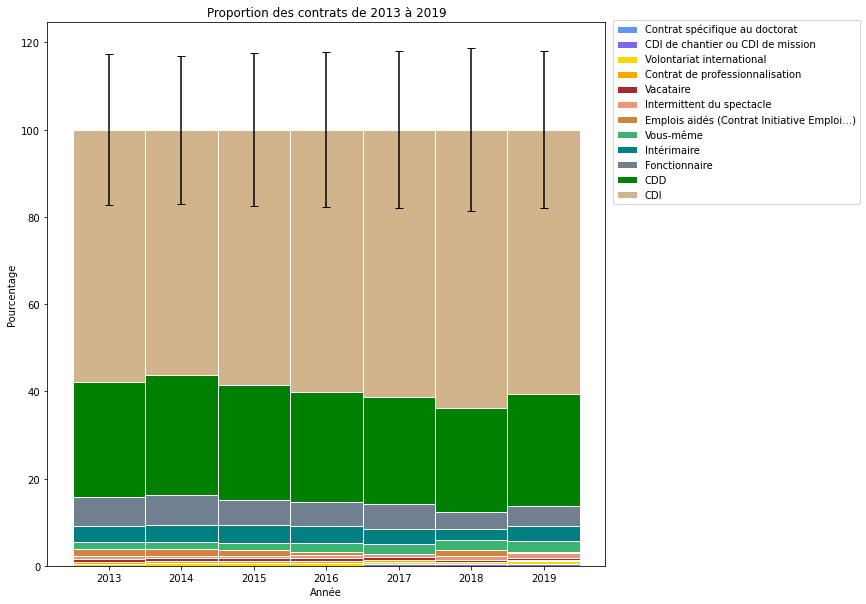

In [1579]:

# Création du stacked Barplot
fig, ax = plt.subplots(figsize=(10,10))
# liste des pourcentages par année pour tout niveau de diplôme confondu
for n, height in enumerate(y):
    if n == nb_var - 1:
        # Indication de l'écart type sur le dernier stack
        ax.bar(x, height, width=1, bottom=bottom, yerr=errors, edgecolor='white', label=labels[n], capsize=4, color=colors[n])
    elif n > 0:
        # création du stack courant avec pour base le sommet du précedent
        ax.bar(x, height, width=1, bottom=bottom, edgecolor='white', label=labels[n], color=colors[n])
        # la base du nouveau stack est le sommet du précédent stack 
        bottom = np.add(bottom, height).tolist()
    else:
        # Création de la première barre
        ax.bar(x, height, width=1, edgecolor='white', label=labels[n], color=colors[n])
        # initialisation de la base du 1er stack
        bottom = height
        
fig.legend(bbox_to_anchor=(1.26, 0.89))
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Proportion des contrats de 2013 à 2019")
plt.show()

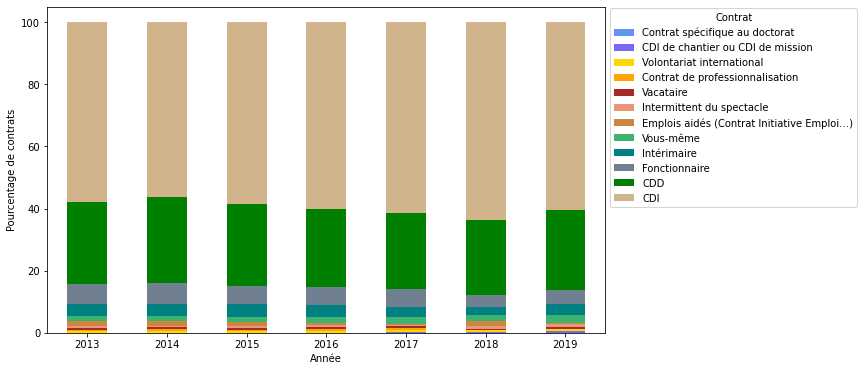

In [1580]:
# Graphique du pourcentage par type de contrats selon l'année
fig, ax = plt.subplots()
df_graph[col_order].plot(kind="bar", stacked=True, figsize=(10, 6), ax=ax, color=colors)
plt.legend(title="Contrat", bbox_to_anchor=(1, 1.01))
plt.xticks(rotation=0)
plt.ylabel("Pourcentage de contrats")
plt.show()

In [1581]:
# Calcul du nombre de diplômés par niveau de diplôme 
df_diplome = df_contrat_tt.groupby(["Année", "Diplôme", "contrat"])[["nb"]].sum()
df_diplome.rename(columns={"nb": "total/diplôme/contrat"}, inplace=True)
df_diplome.reset_index(inplace=True)

In [1582]:
df_diplome

,Année,Diplôme,contrat,total/diplôme/contrat
0,2013,DUT,CDD,597
1,2013,DUT,CDI,1286
2,2013,DUT,CDI de chantier ou CDI de mission,0
3,2013,DUT,Contrat de professionnalisation,23
4,2013,DUT,Contrat spécifique au doctorat,0
...,...,...,...,...
319,2019,MASTER LMD,Intermittent du spectacle,241
320,2019,MASTER LMD,Intérimaire,599
321,2019,MASTER LMD,Vacataire,227
322,2019,MASTER LMD,Volontariat international,312


In [1583]:
df_diplome_tt = df_diplome.pivot_table(index=["Année", "Diplôme"], columns="contrat", values="total/diplôme/contrat")

In [1584]:
df_diplome_tt.head()

contrat             CDD   CDI  CDI de chantier ou CDI de mission  \
Année Diplôme                                                      
2013  DUT           597  1286                                  0   
      LICENCE PRO   881  2184                                  0   
      MASTER ENS     18    12                                  0   
      MASTER LMD   1001  2020                                  0   
2014  DUT           731  1318                                  0   

contrat            Contrat de professionnalisation  \
Année Diplôme                                        
2013  DUT                                       23   
      LICENCE PRO                                8   
      MASTER ENS                                 0   
      MASTER LMD                                 0   
2014  DUT                                       42   

contrat            Contrat spécifique au doctorat  \
Année Diplôme                                       
2013  DUT                                       0   
      LICENCE PRO                               0   
      MASTER ENS                                0   
      MASTER LMD                                0   
2014  DUT                                       0   

contrat            Emplois aidés (Contrat Initiative Emploi…)  Fonctionnaire  \
Année Diplôme                                                                  
2013  DUT                                                  48            117   
      LICENCE PRO                                          73            139   
      MASTER ENS                                            1            164   
      MASTER LMD                                           35            202   
2014  DUT                                                  43            216   

contrat            Intermittent du spectacle  Intérimaire  Vacataire  \
Année Diplôme                                                          
2013  DUT                                  6          122         13   
      LICENCE PRO                         29          143         16   
      MASTER ENS                           0            0          2   
      MASTER LMD                          26           84         45   
2014  DUT                                  4          141         19   

contrat            Volontariat international  Vous-même  
Année Diplôme                                            
2013  DUT                                  2         40  
      LICENCE PRO                          1         51  
      MASTER ENS                           0          0  
      MASTER LMD                          39         68  
2014  DUT                                  0         32

In [1585]:
# Calcul du total par niveau de diplôme et par année
total_diplome = df_diplome_tt.sum(axis=1)

In [1586]:
total_diplome = total_diplome.reset_index()
total_diplome.rename(columns={0: "total/diplôme/année"}, inplace=True)

In [1587]:
total_diplome.head()

,Année,Diplôme,total/diplôme/année
0,2013,DUT,2254
1,2013,LICENCE PRO,3525
2,2013,MASTER ENS,197
3,2013,MASTER LMD,3520
4,2014,DUT,2546


In [1588]:
df_diplome = df_diplome.merge(total_diplome, on=["Année", "Diplôme"])

In [1589]:
# Calcul du pourcentage de diplômé par niveau de diplôme, type de contrat et année
df_diplome["%"] = round(df_diplome["total/diplôme/contrat"] / df_diplome["total/diplôme/année"] * 100, 3)

In [1590]:
df_diplome

,Année,Diplôme,contrat,total/diplôme/contrat,total/diplôme/année,%
0,2013,DUT,CDD,597,2254,26.486
1,2013,DUT,CDI,1286,2254,57.054
2,2013,DUT,CDI de chantier ou CDI de mission,0,2254,0.000
3,2013,DUT,Contrat de professionnalisation,23,2254,1.020
4,2013,DUT,Contrat spécifique au doctorat,0,2254,0.000
...,...,...,...,...,...,...
319,2019,MASTER LMD,Intermittent du spectacle,241,28611,0.842
320,2019,MASTER LMD,Intérimaire,599,28611,2.094
321,2019,MASTER LMD,Vacataire,227,28611,0.793
322,2019,MASTER LMD,Volontariat international,312,28611,1.090


In [1591]:
df_diplome.set_index("Année", inplace=True)

In [1592]:
df_diplome.head()

,Diplôme,contrat,total/diplôme/contrat,total/diplôme/année,%
Année,,,,,
2013,DUT,CDD,597,2254,26.486
2013,DUT,CDI,1286,2254,57.054
2013,DUT,CDI de chantier ou CDI de mission,0,2254,0.000
2013,DUT,Contrat de professionnalisation,23,2254,1.020
2013,DUT,Contrat spécifique au doctorat,0,2254,0.000


In [1593]:
# Sélection par niveau de diplôme
df1 = df_diplome[df_diplome["Diplôme"] == "DUT"]
df2 = df_diplome[df_diplome["Diplôme"] == "LICENCE PRO"]
df3 = df_diplome[df_diplome["Diplôme"] == "MASTER ENS"]
df4 = df_diplome[df_diplome["Diplôme"] == "MASTER LMD"]

In [1594]:
df1 = df1.pivot_table(index=["Année"], columns="contrat", values="%")

In [1595]:
df1

contrat,CDD,CDI,CDI de chantier ou CDI de mission,Contrat de professionnalisation,Contrat spécifique au doctorat,Emplois aidés (Contrat Initiative Emploi…),Fonctionnaire,Intermittent du spectacle,Intérimaire,Vacataire,Volontariat international,Vous-même
Année,,,,,,,,,,,,
2013,26.486,57.054,0.000,1.020,0.0,2.130,5.191,0.266,5.413,0.577,0.089,1.775
2014,28.712,51.767,0.000,1.650,0.0,1.689,8.484,0.157,5.538,0.746,0.000,1.257
2015,28.471,52.366,0.000,1.330,0.0,2.151,6.922,0.196,6.257,0.704,0.196,1.408
2016,26.211,55.742,0.000,2.031,0.0,1.133,5.898,0.156,6.680,0.234,0.156,1.758
2017,25.849,57.301,0.000,1.570,0.0,0.212,6.197,0.000,5.433,1.019,0.170,2.250
2019,22.514,59.039,0.202,0.598,0.0,0.644,6.781,0.672,6.422,0.598,0.037,2.493


In [1596]:
# Ajout de l'année 2018 manquante pour le niveau DUT
df1.loc[2018] = [0] * (df1.columns.size)
df1.sort_index(inplace=True)
df1.reset_index(inplace=True)

In [1597]:
df1 = df1.melt(id_vars="Année", value_vars=df1.columns, value_name="%")

In [1598]:
df1

,Année,contrat,%
0,2013,CDD,26.486
1,2014,CDD,28.712
2,2015,CDD,28.471
3,2016,CDD,26.211
4,2017,CDD,25.849
...,...,...,...
79,2015,Vous-même,1.408
80,2016,Vous-même,1.758
81,2017,Vous-même,2.250
82,2018,Vous-même,0.000


In [1599]:
# Calcul de l'écart-type par diplôme et par année 
df1 = df1.pivot_table(index=["Année"], columns="contrat", values="%")
df2 = df2.pivot_table(index=["Année"], columns="contrat", values="%")
df3 = df3.pivot_table(index=["Année"], columns="contrat", values="%")
df4 = df4.pivot_table(index=["Année"], columns="contrat", values="%")


errors1 = df1.std(axis=1)
errors2 = df2.std(axis=1)
errors3 = df3.std(axis=1)
errors4 = df4.std(axis=1)

In [1600]:
df1

contrat,CDD,CDI,CDI de chantier ou CDI de mission,Contrat de professionnalisation,Contrat spécifique au doctorat,Emplois aidés (Contrat Initiative Emploi…),Fonctionnaire,Intermittent du spectacle,Intérimaire,Vacataire,Volontariat international,Vous-même
Année,,,,,,,,,,,,
2013,26.486,57.054,0.000,1.020,0.0,2.130,5.191,0.266,5.413,0.577,0.089,1.775
2014,28.712,51.767,0.000,1.650,0.0,1.689,8.484,0.157,5.538,0.746,0.000,1.257
2015,28.471,52.366,0.000,1.330,0.0,2.151,6.922,0.196,6.257,0.704,0.196,1.408
2016,26.211,55.742,0.000,2.031,0.0,1.133,5.898,0.156,6.680,0.234,0.156,1.758
2017,25.849,57.301,0.000,1.570,0.0,0.212,6.197,0.000,5.433,1.019,0.170,2.250
2018,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019,22.514,59.039,0.202,0.598,0.0,0.644,6.781,0.672,6.422,0.598,0.037,2.493


In [1601]:
# Réordonnancement selon la valeur maximale du nombre de chaque diplômé par secteur
df1 = df1[df1.max().sort_values().index]
df2 = df2[df2.max().sort_values().index] 
df3 = df3[df3.max().sort_values().index] 
df4 = df4[df4.max().sort_values().index] 

In [1602]:
df1

contrat,Contrat spécifique au doctorat,Volontariat international,CDI de chantier ou CDI de mission,Intermittent du spectacle,Vacataire,Contrat de professionnalisation,Emplois aidés (Contrat Initiative Emploi…),Vous-même,Intérimaire,Fonctionnaire,CDD,CDI
Année,,,,,,,,,,,,
2013,0.0,0.089,0.000,0.266,0.577,1.020,2.130,1.775,5.413,5.191,26.486,57.054
2014,0.0,0.000,0.000,0.157,0.746,1.650,1.689,1.257,5.538,8.484,28.712,51.767
2015,0.0,0.196,0.000,0.196,0.704,1.330,2.151,1.408,6.257,6.922,28.471,52.366
2016,0.0,0.156,0.000,0.156,0.234,2.031,1.133,1.758,6.680,5.898,26.211,55.742
2017,0.0,0.170,0.000,0.000,1.019,1.570,0.212,2.250,5.433,6.197,25.849,57.301
2018,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019,0.0,0.037,0.202,0.672,0.598,0.598,0.644,2.493,6.422,6.781,22.514,59.039


In [1603]:
# Valeurs des ordonnées par type de niveau de diplôme
val_y1 = df1.to_dict('list').values()
val_y2 = df2.to_dict('list').values()
val_y3 = df3.to_dict('list').values()
val_y4 = df4.to_dict('list').values()

In [1604]:
# Définition en année de l'axe des abscisses
x1, x2, x3, x4 = df1.index, df2.index, df3.index, df4.index

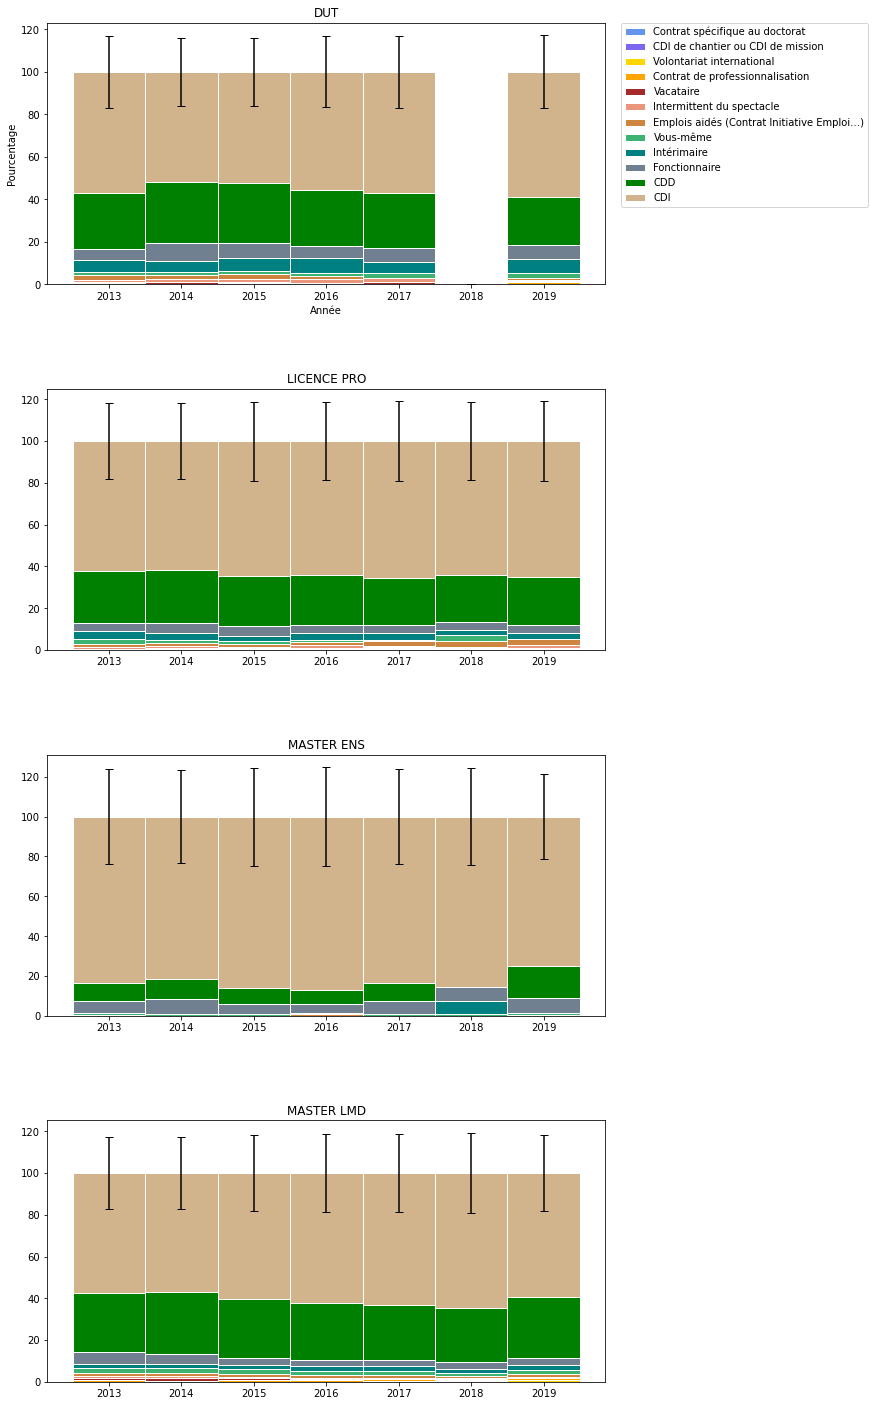

In [1605]:
### Création du stacked Barplot ###
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,25), sharex=False)
# Chargement des ordonnées pour chaque niveau de diplôme
for n, (y1, y2, y3, y4) in enumerate(zip(val_y1, val_y2, val_y3, val_y4)):
    if n == nb_var - 1:
        # Indication de l'écart type sur le dernier stack
        ax1.bar(x1, y1, width=1, bottom=bottom1, yerr=errors1, edgecolor='white', label=labels[n], capsize=4, color=colors[n])
        ax2.bar(x2, y2, width=1, bottom=bottom2, yerr=errors2, edgecolor='white', label=labels[n], capsize=4, color=colors[n])
        ax3.bar(x3, y3, width=1, bottom=bottom3, yerr=errors3, edgecolor='white', label=labels[n], capsize=4, color=colors[n])
        ax4.bar(x4, y4, width=1, bottom=bottom4, yerr=errors4, edgecolor='white', label=labels[n], capsize=4, color=colors[n])
    elif n > 0:
        # création du stack courant avec pour base le sommet du précedent
        ax1.bar(x1, y1, width=1, bottom=bottom1, edgecolor='white', label=labels[n], color=colors[n])
        ax2.bar(x2, y2, width=1, bottom=bottom2, edgecolor='white', label=labels[n], color=colors[n])
        ax3.bar(x3, y3, width=1, bottom=bottom3, edgecolor='white', label=labels[n], color=colors[n])
        ax4.bar(x4, y4, width=1, bottom=bottom4, edgecolor='white', label=labels[n], color=colors[n])
        # la base du nouveau stack est le sommet du précédent stack 
        bottom1 = np.add(bottom1, y1).tolist()
        bottom2 = np.add(bottom2, y2).tolist()
        bottom3 = np.add(bottom3, y3).tolist()
        bottom4 = np.add(bottom4, y4).tolist()
    else:
        # Création de la première barre
        ax1.bar(x1, y1, width=1, edgecolor='white', label=labels[n], color=colors[n])
        ax2.bar(x2, y2, width=1, edgecolor='white', label=labels[n], color=colors[n])
        ax3.bar(x3, y3, width=1, edgecolor='white', label=labels[n], color=colors[n])
        ax4.bar(x4, y4, width=1, edgecolor='white', label=labels[n], color=colors[n])
        # initialisation de la base du 1er stack
        bottom1, bottom2, bottom3, bottom4 = y1, y2, y3, y4
        
ax1.legend(bbox_to_anchor=(1.02, 1.02))
# Titre des graphs
ax1.set_title("DUT")
ax2.set_title("LICENCE PRO")
ax3.set_title("MASTER ENS")
ax4.set_title("MASTER LMD")

ax1.set_xlabel("Année")
ax1.set_ylabel("Pourcentage")

# Décalage de chacun des graphs vers la bas 
plt.subplots_adjust(hspace=0.4)
plt.show()

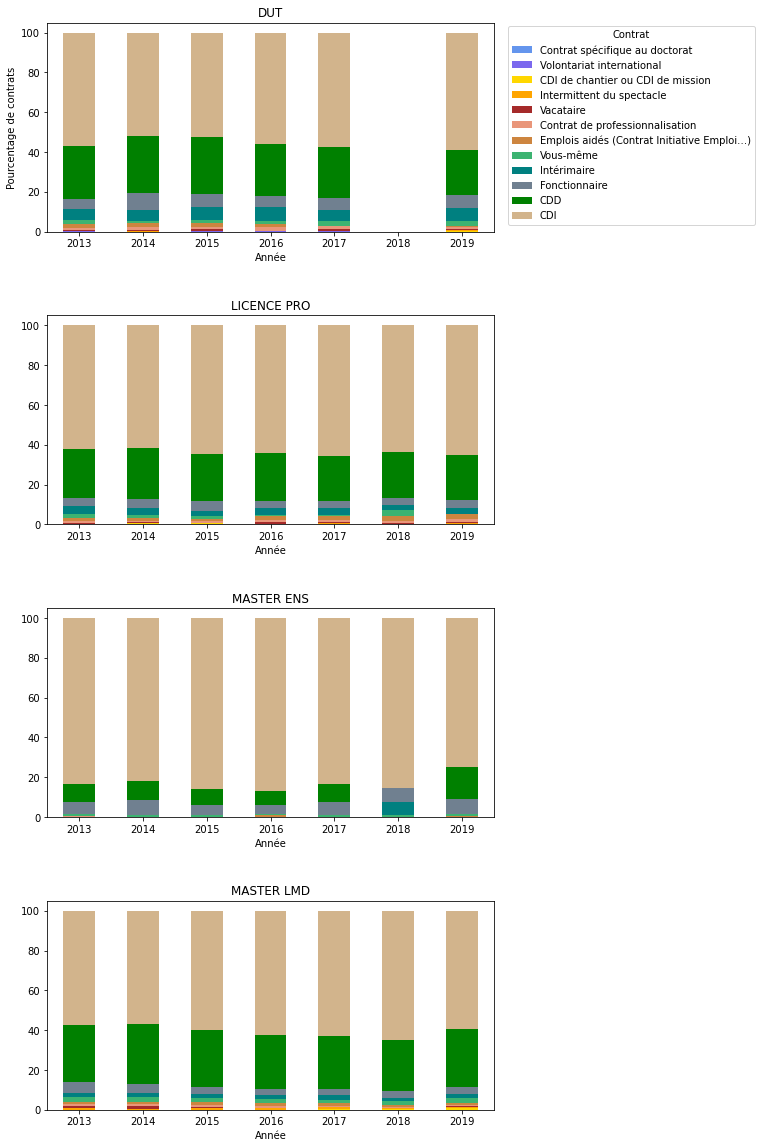

In [1606]:
# Création des graphs
fig, (ax1,ax2, ax3, ax4) = plt.subplots(4, 1, sharex=False,figsize = (8, 20))
df1.plot(kind="bar", stacked=True, ax=ax1, legend=True, rot=0, color=colors)
df2.plot(kind="bar", stacked=True, ax=ax2, legend=False, rot=0, color=colors)
df3.plot(kind="bar", stacked=True, ax=ax3, legend=False, rot=0, color=colors)
df4.plot(kind="bar", stacked=True, ax=ax4, legend=False, rot=0, color=colors)
ax1.set_ylabel("Pourcentage de contrats")
# Legende des graphs
ax1.legend(title="Contrat", bbox_to_anchor=(1.02, 1.01))
# Titre des graphs
ax1.set_title("DUT")
ax2.set_title("LICENCE PRO")
ax3.set_title("MASTER ENS")
ax4.set_title("MASTER LMD")
# Décalage de chacun des graphs vers la bas 
plt.subplots_adjust(hspace=0.4)
plt.show()

In [1607]:
# Sélection des secteurs
secteurs = df.iloc[:, 15:]
df_secteur = df.iloc[:, 0:3].join(secteurs)

In [1608]:
df_secteur = df_secteur.groupby(["Année", "Diplôme"]).sum()

In [1609]:
df_secteur.head()

La fonction publique (d''etat',' territoriale ou hospitalière)  \
Année Diplôme                                                                       
2013  DUT                                                        235                
      LICENCE PRO                                                255                
      MASTER ENS                                                   0                
      MASTER LMD                                                   0                
2014  DUT                                                        315                

                   Une entreprise privée  Une entreprise publique  \
Année Diplôme                                                       
2013  DUT                             92                      739   
      LICENCE PRO                     70                     1180   
      MASTER ENS                       0                        5   
      MASTER LMD                      61                     1082   
2014  DUT                             96                      765   

                   Une association  \
Année Diplôme                        
2013  DUT                       85   
      LICENCE PRO              203   
      MASTER ENS                 2   
      MASTER LMD               183   
2014  DUT                       64   

                   Une personne exerçant une profession libérale ou un indépendant  \
Année Diplôme                                                                        
2013  DUT                                                          4                 
      LICENCE PRO                                                 21                 
      MASTER ENS                                                   0                 
      MASTER LMD                                                  14                 
2014  DUT                                                         20                 

                   Organisation internationale ou une institution de l''Union européenne  \
Année Diplôme                                                                              
2013  DUT                                                          0                       
      LICENCE PRO                                                  0                       
      MASTER ENS                                                   0                       
      MASTER LMD                                                   0                       
2014  DUT                                                          0                       

                   Société d''économie mixte  Un particulier  \
Année Diplôme                                                  
2013  DUT                                  0               8   
      LICENCE PRO                          0               9   
      MASTER ENS                           0               0   
      MASTER LMD                           0               1   
2014  DUT                                  0               6   

                   Agriculture', sylviculture et pêche  \
Année Diplôme                                            
2013  DUT                                           23   
      LICENCE PRO                                   72   
      MASTER ENS                                     0   
      MASTER LMD                                     0   
2014  DUT                                           13   

                   Industries (manufacturières,  extractives et autres)  ...  \
Année Diplôme                                                            ...   
2013  DUT                                                        217     ...   
      LICENCE PRO                                                250     ...   
      MASTER ENS                                                   0     ...   
      MASTER LMD                                                 188     ...   
2014  DUT                                                        194     ...   

       

In [1610]:
# Calcul du nombre de diplômés dans tous les secteurs par année et par niveau
df_secteur["total/diplôme"] = df_secteur.iloc[:, 3:].sum(axis=1)
df_secteur.reset_index(inplace=True)

In [1611]:
secteur_count = df_secteur.melt(id_vars=["Année", "Diplôme", "total/diplôme"], value_name="nb", var_name="secteur")

In [1612]:
secteur_count

,Année,Diplôme,total/diplôme,secteur,nb
0,2013,DUT,3500,"La fonction publique (d''etat',' territoriale ...",235
1,2013,LICENCE PRO,5618,"La fonction publique (d''etat',' territoriale ...",255
2,2013,MASTER ENS,394,"La fonction publique (d''etat',' territoriale ...",0
3,2013,MASTER LMD,6121,"La fonction publique (d''etat',' territoriale ...",0
4,2014,DUT,3988,"La fonction publique (d''etat',' territoriale ...",315
...,...,...,...,...,...
1102,2018,MASTER LMD,12335,"Ingénieur, cadre, prof. libérales, prof. intel...",3688
1103,2019,DUT,16883,"Ingénieur, cadre, prof. libérales, prof. intel...",0
1104,2019,LICENCE PRO,29064,"Ingénieur, cadre, prof. libérales, prof. intel...",0
1105,2019,MASTER ENS,1180,"Ingénieur, cadre, prof. libérales, prof. intel...",21


In [1613]:
secteur_count.head()

,Année,Diplôme,total/diplôme,secteur,nb
0,2013,DUT,3500,"La fonction publique (d''etat',' territoriale ...",235
1,2013,LICENCE PRO,5618,"La fonction publique (d''etat',' territoriale ...",255
2,2013,MASTER ENS,394,"La fonction publique (d''etat',' territoriale ...",0
3,2013,MASTER LMD,6121,"La fonction publique (d''etat',' territoriale ...",0
4,2014,DUT,3988,"La fonction publique (d''etat',' territoriale ...",315


In [1614]:
# Calcul de la proportion pour l'ensemble des niveaux de diplôme par année.
secteur_tt = secteur_count.groupby(["Année", "secteur"])[["nb"]].sum()
secteur_tt.rename(columns={"nb": "total/secteur"}, inplace=True)

In [1615]:
secteur_tt.reset_index(inplace=True)

In [1616]:
# Calcul du total de diplômés par année
total = secteur_count.groupby(["Année"])[["nb"]].sum()
total.rename(columns={"nb": "total/année"}, inplace=True)

In [1617]:
total

,total/année
Année,
2013,19352
2014,19582
2015,19780
2016,19950
2017,19126
2018,35896
2019,120036


In [1618]:
secteur_tt = secteur_tt.merge(total, on="Année")

In [1619]:
secteur_tt

,Année,secteur,total/secteur,total/année
0,2013,Activités de services administratifs et de sou...,129,19352
1,2013,Activités financières et d’assurance,320,19352
2,2013,Activités immobilières,0,19352
3,2013,"Activités spécialisées, scientifiques et techn...",480,19352
4,2013,Administra tion publique (hors ens.),103,19352
...,...,...,...,...
282,2019,Un particulier,37,120036
283,2019,Une association,2603,120036
284,2019,Une entreprise privée,19301,120036
285,2019,Une entreprise publique,1029,120036


In [1620]:
# Calcul de la proportion de diplômés dans chaque secteur par année
secteur_tt["%"] = round(secteur_tt["total/secteur"] / secteur_tt["total/année"] * 100, 3)

In [1621]:
secteur_tt

,Année,secteur,total/secteur,total/année,%
0,2013,Activités de services administratifs et de sou...,129,19352,0.667
1,2013,Activités financières et d’assurance,320,19352,1.654
2,2013,Activités immobilières,0,19352,0.000
3,2013,"Activités spécialisées, scientifiques et techn...",480,19352,2.480
4,2013,Administra tion publique (hors ens.),103,19352,0.532
...,...,...,...,...,...
282,2019,Un particulier,37,120036,0.031
283,2019,Une association,2603,120036,2.169
284,2019,Une entreprise privée,19301,120036,16.079
285,2019,Une entreprise publique,1029,120036,0.857


In [1622]:
df_graph = secteur_tt.pivot_table(index=["Année"], values="%", columns="secteur")


In [1623]:
# Changement de l'ordre des colonnes selon la valeur maximale de chacune d'entre elles.
col_order = df_graph.max().sort_values().index

In [1624]:
# Calcul de l'écart type par année
errors = df_graph.std(axis=1)

In [1625]:
# Axe des ordonnées. Récupération des valeurs de chaque type de contrat depuis un dictionnaire
y = df_graph[col_order].to_dict('list').values()

# Axe des abscisses en année
x = df_graph.index

# Nombre de variables à stacker
nb_var = df_graph.shape[1]

labels = col_order

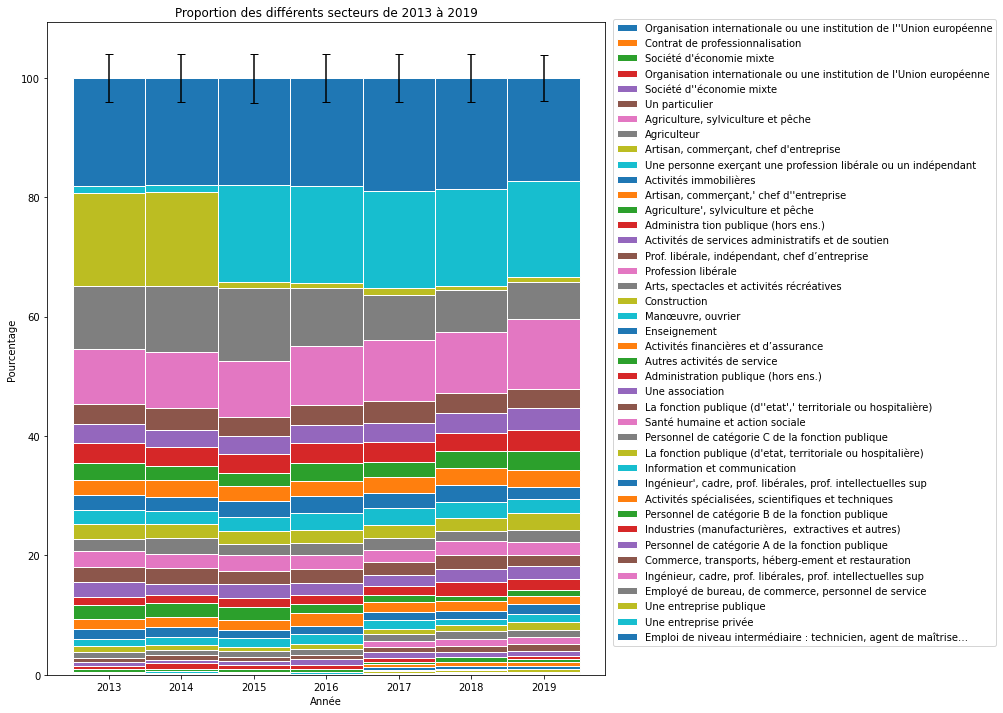

In [1626]:
# Création du stacked Barplot
fig, ax = plt.subplots(figsize=(10,12))
# liste des pourcentages par année pour tout niveau de diplôme confondu
for n, height in enumerate(y):
    if n == nb_var - 1:
        # Indication de l'écart type sur le dernier stack
        ax.bar(x, height, width=1, bottom=bottom, yerr=errors, edgecolor='white', label=labels[n], capsize=4)
    elif n > 0:
        # création du stack courant avec pour base le sommet du précedent
        ax.bar(x, height, width=1, bottom=bottom, edgecolor='white', label=labels[n])
        # la base du nouveau stack est le sommet du précédent stack 
        bottom = np.add(bottom, height).tolist()
    else:
        # Création de la première barre
        ax.bar(x, height, width=1, edgecolor='white', label=labels[n])
        # initialisation de la base du 1er stack
        bottom = height
        
fig.legend(bbox_to_anchor=(1.45, 0.89))
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Proportion des différents secteurs de 2013 à 2019")
plt.show()

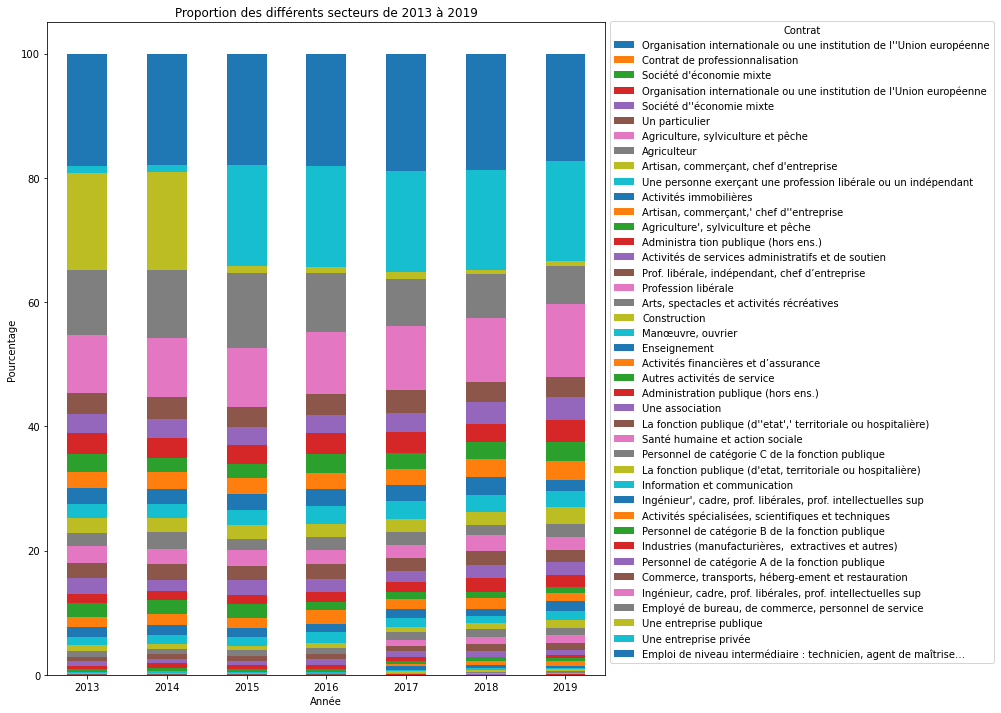

In [1627]:
# Graphique du pourcentage par type de contrats selon l'année
fig, ax = plt.subplots()
df_graph[col_order].plot(kind="bar", stacked=True, figsize=(10, 12), ax=ax)
plt.legend(title="Contrat", bbox_to_anchor=(1, 1.01))
plt.xticks(rotation=0)
plt.ylabel("Pourcentage")
plt.title("Proportion des différents secteurs de 2013 à 2019")
plt.show()

2. Etude de l'insertion professionnelle des doctorants

In [1628]:
ins_prof_doctorat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 21 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Année d’obtention                                                                240 non-null    int64  
 1   Diplôme                                                                          240 non-null    object 
 2   Situation                                                                        240 non-null    object 
 3   Discipline principale agrégée                                                    240 non-null    object 
 4   Discipline principale                                                            240 non-null    object 
 5   Genre                                                                            240 non-null    object 
 6   Nombre de 

In [1629]:
ins_prof_doctorat.rename(columns=
                            {"Répartition des docteurs en emploi dans le secteur académique": "secteur académique",
                            "Répartition des docteurs en emploi dans le public hors secteur académique": "public hors secteur académique",
                            "Répartition des docteurs en emploi dans la R&D privée": "R&D privée",
                            "Répartition des docteurs en emploi dans le privé hors secteur académique et R&D": "privé hors secteur académique et R&D",
                            "1er quartile du salaire net mensuel des emplois à temps plein": "1er quartile du salaire net mensuel",
                            "Salaire net mensuel médian des emplois à temps plein": "Salaire net mensuel médian",
                            "3ème quartile du salaire net mensuel des emplois à temps plein": "3ème quartile du salaire net mensuel"},
                            inplace=True)

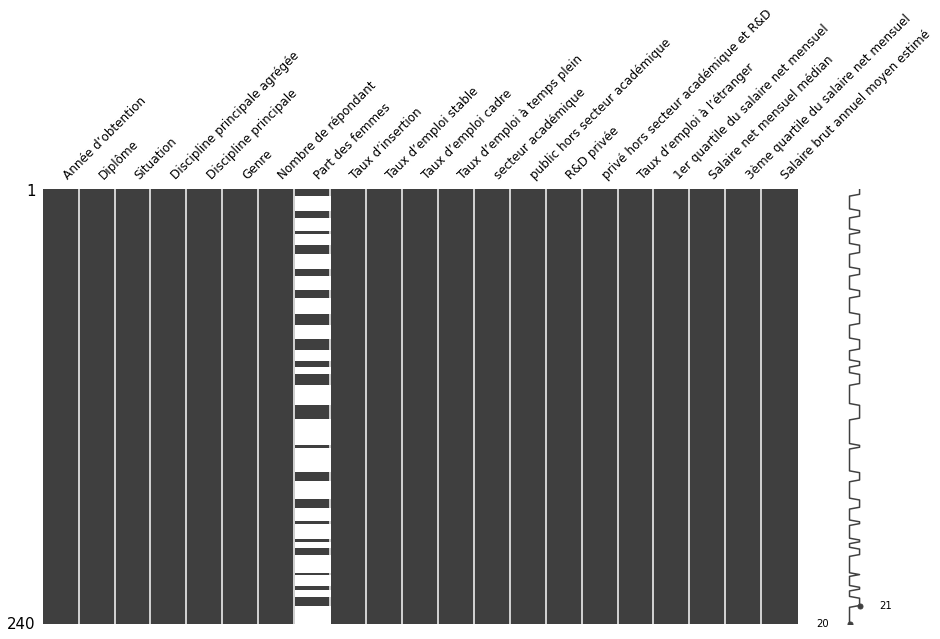

In [1630]:
msno.matrix(ins_prof_doctorat, fontsize=12, figsize=(15,8))
plt.show()

In [1631]:
# Trie par Genre
df_sort = ins_prof_doctorat.sort_values("Genre")

In [1632]:
df_sort.head()

,Année d’obtention,Diplôme,Situation,Discipline principale agrégée,Discipline principale,Genre,Nombre de répondant,Part des femmes,Taux d’insertion,Taux d’emploi stable,...,Taux d’emploi à temps plein,secteur académique,public hors secteur académique,R&D privée,privé hors secteur académique et R&D,Taux d’emploi à l’étranger,1er quartile du salaire net mensuel,Salaire net mensuel médian,3ème quartile du salaire net mensuel,Salaire brut annuel moyen estimé
188,2016,DOCTORAT,12 mois après le diplôme,Sciences de la société,Sciences économiques et de gestion,femmes,174,NaN,90,62,...,91,61,20,6,13,29,1880,2200,2800,36107
61,2014,DOCTORAT,12 mois après le diplôme,Sciences et leurs interactions,Mathématiques et leurs interactions,femmes,103,NaN,87,45,...,95,57,17,11,15,42,ns,ns,ns,ns
60,2014,DOCTORAT,12 mois après le diplôme,Ensemble Sciences et leurs interactions,Sciences et leurs interactions,femmes,996,NaN,86,50,...,97,47,11,20,22,36,1895,2160,2438,32000
131,2016,DOCTORAT,12 mois après le diplôme,Sciences du vivant,Sciences agronomiques et écologiques,femmes,144,NaN,78,35,...,96,63,17,10,11,36,ns,ns,ns,ns
130,2016,DOCTORAT,12 mois après le diplôme,Sciences et leurs interactions,Sciences et TIC,femmes,186,NaN,86,60,...,96,51,6,28,15,29,2000,2300,2617,36936


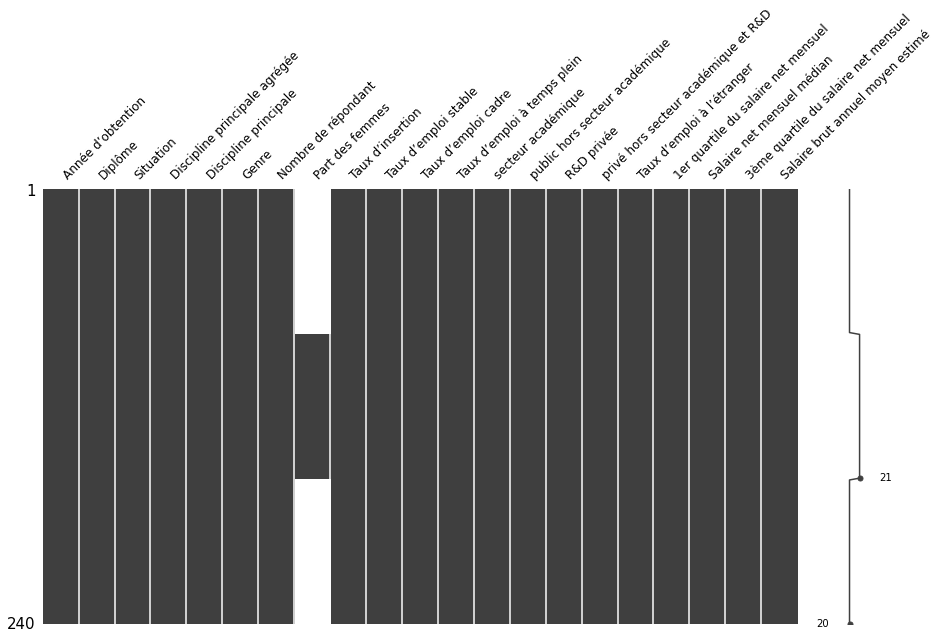

In [1633]:
msno.matrix(df_sort, fontsize=12, figsize=(15,8))
plt.show()

In [1634]:
### Correction du nombre manquant de part par genre ###

# Mise à zero du pourcentage de femmes pour le genre homme
ins_prof_doctorat.loc[ins_prof_doctorat["Genre"] == "hommes", "Part des femmes"] = 0

# Remplacement des lignes du pourcentage de femmes à valeur manquante par 100 % pour le genre femme
ins_prof_doctorat.loc[ins_prof_doctorat["Part des femmes"].isna(), "Part des femmes"] = 100

In [1635]:
ins_prof_doctorat.sort_values(["Année d’obtention", "Situation", "Discipline principale"], inplace=True)

In [1636]:
# Les lignes du genre "hommes et femmes" sont le regroupement des genres hommes et femmes par discpline et par situation
ins_prof_doctorat.head()

,Année d’obtention,Diplôme,Situation,Discipline principale agrégée,Discipline principale,Genre,Nombre de répondant,Part des femmes,Taux d’insertion,Taux d’emploi stable,...,Taux d’emploi à temps plein,secteur académique,public hors secteur académique,R&D privée,privé hors secteur académique et R&D,Taux d’emploi à l’étranger,1er quartile du salaire net mensuel,Salaire net mensuel médian,3ème quartile du salaire net mensuel,Salaire brut annuel moyen estimé
19,2014,DOCTORAT,12 mois après le diplôme,Sciences du vivant,"Biologie, médecine et santé",hommes,552,0.0,87,39,...,96,68,13,8,11,40,1851,2188,3007,31920
109,2014,DOCTORAT,12 mois après le diplôme,Sciences du vivant,"Biologie, médecine et santé",femmes,719,100.0,82,32,...,93,64,17,8,11,34,1867,2108,2531,30000
171,2014,DOCTORAT,12 mois après le diplôme,Sciences du vivant,"Biologie, médecine et santé",femmes et hommes,1271,55.0,84,36,...,95,66,16,8,10,36,1867,2125,2720,30492
12,2014,DOCTORAT,12 mois après le diplôme,Sciences et leurs interactions,Chimie et sciences des matériaux,femmes et hommes,769,45.0,81,45,...,98,52,9,22,17,38,1875,2125,2323,31000
18,2014,DOCTORAT,12 mois après le diplôme,Sciences et leurs interactions,Chimie et sciences des matériaux,hommes,452,0.0,81,46,...,97,53,8,23,16,38,1875,2125,2345,30492


In [1637]:
# colonnes des pourcentages
percent_col = ins_prof_doctorat.columns[7:17] 

# total de personnes pour chaque discipline par année et par genre
total = ins_prof_doctorat["Nombre de répondant"]

# Convertion des taux en nombre de personnes
for col in percent_col:
    ins_prof_doctorat["nb_" + col] = round(total * (ins_prof_doctorat[col] / 100), 2)


In [1638]:
ins_prof_doctorat.head()

,Année d’obtention,Diplôme,Situation,Discipline principale agrégée,Discipline principale,Genre,Nombre de répondant,Part des femmes,Taux d’insertion,Taux d’emploi stable,...,nb_Part des femmes,nb_Taux d’insertion,nb_Taux d’emploi stable,nb_Taux d’emploi cadre,nb_Taux d’emploi à temps plein,nb_secteur académique,nb_public hors secteur académique,nb_R&D privée,nb_privé hors secteur académique et R&D,nb_Taux d’emploi à l’étranger
19,2014,DOCTORAT,12 mois après le diplôme,Sciences du vivant,"Biologie, médecine et santé",hommes,552,0.0,87,39,...,0.00,480.24,215.28,518.88,529.92,375.36,71.76,44.16,60.72,220.80
109,2014,DOCTORAT,12 mois après le diplôme,Sciences du vivant,"Biologie, médecine et santé",femmes,719,100.0,82,32,...,719.00,589.58,230.08,654.29,668.67,460.16,122.23,57.52,79.09,244.46
171,2014,DOCTORAT,12 mois après le diplôme,Sciences du vivant,"Biologie, médecine et santé",femmes et hommes,1271,55.0,84,36,...,699.05,1067.64,457.56,1169.32,1207.45,838.86,203.36,101.68,127.10,457.56
12,2014,DOCTORAT,12 mois après le diplôme,Sciences et leurs interactions,Chimie et sciences des matériaux,femmes et hommes,769,45.0,81,45,...,346.05,622.89,346.05,730.55,753.62,399.88,69.21,169.18,130.73,292.22
18,2014,DOCTORAT,12 mois après le diplôme,Sciences et leurs interactions,Chimie et sciences des matériaux,hommes,452,0.0,81,46,...,0.00,366.12,207.92,424.88,438.44,239.56,36.16,103.96,72.32,171.76


In [1639]:
# Selection des lignes indiquant la somme des répondants par situation et par genre (Ensemble)
ensemble = ins_prof_doctorat[ins_prof_doctorat["Discipline principale"] == "Ensemble"].index
# Supression des lignes contenant "Ensemble"
ins_prof_doctorat = ins_prof_doctorat.drop(ensemble)

In [1640]:
# Nombre de personnes par disciplines et par année pour chaque secteur d'insertion professionnel 
df_secteur = ins_prof_doctorat.groupby(
    ["Année d’obtention", "Discipline principale", "Genre"])[[
        "Nombre de répondant", 
        "nb_Part des femmes", "nb_secteur académique", 
        "nb_public hors secteur académique", "nb_R&D privée",
        "nb_privé hors secteur académique et R&D", "nb_Taux d’emploi à l’étranger"]].sum()

In [1641]:
df_secteur.head()

Nombre de répondant  \
Année d’obtention Discipline principale            Genre                                   
2014              Biologie, médecine et santé      femmes                           1438   
                                                   femmes et hommes                 2542   
                                                   hommes                           1104   
                  Chimie et sciences des matériaux femmes                            634   
                                                   femmes et hommes                 1538   

                                                                     nb_Part des femmes  \
Année d’obtention Discipline principale            Genre                                  
2014              Biologie, médecine et santé      femmes                        1438.0   
                                                   femmes et hommes              1398.1   
                                                   hommes                           0.0   
                  Chimie et sciences des matériaux femmes                         634.0   
                                                   femmes et hommes               692.1   

                                                                     nb_secteur académique  \
Année d’obtention Discipline principale            Genre                                     
2014              Biologie, médecine et santé      femmes                           913.13   
                                                   femmes et hommes                1652.30   
                                                   hommes                           739.68   
                  Chimie et sciences des matériaux femmes                           278.96   
                                                   femmes et hommes                 722.86   

                                                                     nb_public hors secteur académique  \
Année d’obtention Discipline principale            Genre                                                 
2014              Biologie, médecine et santé      femmes                                       208.51   
                                                   femmes et hommes                             355.88   
                                                   hommes                                       132.48   
                  Chimie et sciences des matériaux femmes                                        79.25   
                                                   femmes et hommes                             153.80   

                                                                     nb_R&D privée  \
Année d’obtention Discipline principale            Genre                             
2014              Biologie, médecine et santé      femmes                    143.8   
                                                   femmes et hommes          254.2   
                                                   hommes                    110.4   
                  Chimie et sciences des matériaux femmes                    158.5   
                                                   femmes et hommes          384.5   

                                                                     nb_privé hors secteur académique et R&D  \
Année d’obtention Discipline principale            Genre                                                       
2014              Biologie, médecine et santé      femmes                                             172.56   
                                                   femmes et hommes                                   279.62   
                                                   hommes                                             121.44   
                  Chimie et sciences des matériaux femmes                                             117.29   
                                                   femmes et hommes                                   276.84 

In [1642]:
# Indication du nombre total de personne pour chaque discipline par année pour chaque catégorie de genre
df_genre = df_secteur.pivot_table(columns=["Genre"], values="Nombre de répondant", index=["Année d’obtention", "Discipline principale"])

In [1643]:
df_genre = df_genre[["femmes", "hommes", "femmes et hommes"]]

In [1644]:
df_genre.head(20)

Genre                                                           femmes  \
Année d’obtention Discipline principale                                  
2014              Biologie, médecine et santé                     1438   
                  Chimie et sciences des matériaux                 634   
                  Histoire, géographie                             382   
                  Langues et littératures                          406   
                  Mathématiques et leurs interactions              206   
                  Philosophie et arts                              202   
                  Physique                                         292   
                  Sciences agronomiques et écologiques             234   
                  Sciences de la société                           966   
                  Sciences de la terre et de l’univers, espace     224   
                  Sciences du vivant                              1672   
                  Sciences et TIC                                  336   
                  Sciences et leurs interactions                  1992   
                  Sciences humaines                                352   
                  Sciences humaines et humanités                  1342   
                  Sciences juridiques et politiques                376   
                  Sciences pour l’ingénieur                        300   
                  Sciences sociales, sociologie, démographie       242   
                  Sciences économiques et de gestion               348   
2016              Biologie, médecine et santé                     1674   

Genre                                                           hommes  \
Année d’obtention Discipline principale                                  
2014              Biologie, médecine et santé                     1104   
                  Chimie et sciences des matériaux                 904   
                  Histoire, géographie                             340   
                  Langues et littératures                          208   
                  Mathématiques et leurs interactions              522   
                  Philosophie et arts                              184   
                  Physique                                         794   
                  Sciences agronomiques et écologiques             216   
                  Sciences de la société                           938   
                  Sciences de la terre et de l’univers, espace     350   
                  Sciences du vivant                              1320   
                  Sciences et TIC                                 1188   
                  Sciences et leurs interactions                  4832   
                  Sciences humaines                                316   
                  Sciences humaines et humanités                  1048   
                  Sciences juridiques et politiques                390   
                  Sciences pour l’ingénieur                       1074   
                  Sciences sociales, sociologie, démographie       184   
                  Sciences économiques et de gestion               364   
2016              Biologie, médecine et santé                     1308   

Genre                                                           femmes et hommes  
Année d’obtention Discipline principale                                           
2014              Biologie, médecine et santé                               2542  
                  Chimie et sciences des matériaux                          1538  
                  Histoire, géographie                                       722  
                  Langues et littératures                                    614  
                  Mathématiques et leurs interactions                        728  
                  Philosophie et arts                                        386  
                  Physique                                                  10

In [1645]:
# Indication du total du nombre de personnes pour l'ensemble des genres dans toutes les disciplines
df = df_secteur.merge(df_genre[["femmes et hommes"]], on=["Année d’obtention", "Discipline principale"])

In [1646]:
df.head()

Nombre de répondant  \
Année d’obtention Discipline principale                                   
2014              Biologie, médecine et santé                      1438   
                  Biologie, médecine et santé                      2542   
                  Biologie, médecine et santé                      1104   
                  Chimie et sciences des matériaux                  634   
                  Chimie et sciences des matériaux                 1538   

                                                    nb_Part des femmes  \
Année d’obtention Discipline principale                                  
2014              Biologie, médecine et santé                   1438.0   
                  Biologie, médecine et santé                   1398.1   
                  Biologie, médecine et santé                      0.0   
                  Chimie et sciences des matériaux               634.0   
                  Chimie et sciences des matériaux               692.1   

                                                    nb_secteur académique  \
Année d’obtention Discipline principale                                     
2014              Biologie, médecine et santé                      913.13   
                  Biologie, médecine et santé                     1652.30   
                  Biologie, médecine et santé                      739.68   
                  Chimie et sciences des matériaux                 278.96   
                  Chimie et sciences des matériaux                 722.86   

                                                    nb_public hors secteur académique  \
Année d’obtention Discipline principale                                                 
2014              Biologie, médecine et santé                                  208.51   
                  Biologie, médecine et santé                                  355.88   
                  Biologie, médecine et santé                                  132.48   
                  Chimie et sciences des matériaux                              79.25   
                  Chimie et sciences des matériaux                             153.80   

                                                    nb_R&D privée  \
Année d’obtention Discipline principale                             
2014              Biologie, médecine et santé               143.8   
                  Biologie, médecine et santé               254.2   
                  Biologie, médecine et santé               110.4   
                  Chimie et sciences des matériaux          158.5   
                  Chimie et sciences des matériaux          384.5   

                                                    nb_privé hors secteur académique et R&D  \
Année d’obtention Discipline principale                                                       
2014              Biologie, médecine et santé                                        172.56   
                  Biologie, médecine et santé                                        279.62   
                  Biologie, médecine et santé                                        121.44   
                  Chimie et sciences des matériaux                                   117.29   
                  Chimie et sciences des matériaux                                   276.84   

                                                    nb_Taux d’emploi à l’étranger  \
Année d’obtention Discipline principale                                             
2014              Biologie, médecine et santé                              503.30   
                  Biologie, médecine et santé                              927.83   
                  Biologie, médecine et santé                              436.08   
                  Chimie et sciences des matériaux                         234.58   
                  Chimie et sciences des matériaux                         569.06   

                                                    femmes et hommes  
Année d’obtention Discipli

In [1647]:
# Ajout de la variable indiquant le genre par discipline
df["Genre"] = df_secteur.index.get_level_values(2) 
df_secteur = df.copy()
df_secteur.rename(columns={"femmes et hommes": "total/discipline"}, inplace=True)

In [1648]:
df_secteur.reset_index("Discipline principale", inplace=True)

In [1649]:
# Total des hommes et des femmes pour l'ensemble des disciplines
total_disciplines = df_secteur.loc[df_secteur["Genre"] == "femmes et hommes"].groupby("Année d’obtention")[["total/discipline"]].sum()

In [1650]:
total_disciplines.rename(columns={"total/discipline": "total/année"}, inplace=True)

In [1651]:
total_disciplines.head()

,total/année
Année d’obtention,
2014,28220
2016,33116


In [1652]:
# Indication du total pour l'ensemble des disciplines par année pour chaque discipline
df_secteur = df_secteur.merge(total_disciplines, on="Année d’obtention")

In [1653]:
df_secteur.head()

,Discipline principale,Nombre de répondant,nb_Part des femmes,nb_secteur académique,nb_public hors secteur académique,nb_R&D privée,nb_privé hors secteur académique et R&D,nb_Taux d’emploi à l’étranger,total/discipline,Genre,total/année
Année d’obtention,,,,,,,,,,,
2014,"Biologie, médecine et santé",1438,1438.0,913.13,208.51,143.8,172.56,503.30,2542,femmes,28220
2014,"Biologie, médecine et santé",2542,1398.1,1652.30,355.88,254.2,279.62,927.83,2542,femmes et hommes,28220
2014,"Biologie, médecine et santé",1104,0.0,739.68,132.48,110.4,121.44,436.08,2542,hommes,28220
2014,Chimie et sciences des matériaux,634,634.0,278.96,79.25,158.5,117.29,234.58,1538,femmes,28220
2014,Chimie et sciences des matériaux,1538,692.1,722.86,153.80,384.5,276.84,569.06,1538,femmes et hommes,28220


In [1654]:
# Réordonnancement des colonnes
col_order = df_secteur.columns[-3:].to_list() + df_secteur.columns[0:7].to_list()
df_secteur = df_secteur[col_order]

In [1655]:
df_secteur.head()

,total/discipline,Genre,total/année,Discipline principale,Nombre de répondant,nb_Part des femmes,nb_secteur académique,nb_public hors secteur académique,nb_R&D privée,nb_privé hors secteur académique et R&D
Année d’obtention,,,,,,,,,,
2014,2542,femmes,28220,"Biologie, médecine et santé",1438,1438.0,913.13,208.51,143.8,172.56
2014,2542,femmes et hommes,28220,"Biologie, médecine et santé",2542,1398.1,1652.30,355.88,254.2,279.62
2014,2542,hommes,28220,"Biologie, médecine et santé",1104,0.0,739.68,132.48,110.4,121.44
2014,1538,femmes,28220,Chimie et sciences des matériaux,634,634.0,278.96,79.25,158.5,117.29
2014,1538,femmes et hommes,28220,Chimie et sciences des matériaux,1538,692.1,722.86,153.80,384.5,276.84


In [1656]:
# Sélection des colonnes indiquant le nombre de personnes par secteur
col_secteur = df_secteur.columns[4:]

In [1657]:
# Pourcentage pour chaque secteur et discipline
for col in col_secteur:
    df_secteur["%_" + col] = round(df_secteur[col].loc[[2014, 2016]] / total_disciplines.loc[[2014, 2016], "total/année"] * 100, 2)

In [1658]:
df_secteur.head()

,total/discipline,Genre,total/année,Discipline principale,Nombre de répondant,nb_Part des femmes,nb_secteur académique,nb_public hors secteur académique,nb_R&D privée,nb_privé hors secteur académique et R&D,%_Nombre de répondant,%_nb_Part des femmes,%_nb_secteur académique,%_nb_public hors secteur académique,%_nb_R&D privée,%_nb_privé hors secteur académique et R&D
Année d’obtention,,,,,,,,,,,,,,,,
2014,2542,femmes,28220,"Biologie, médecine et santé",1438,1438.0,913.13,208.51,143.8,172.56,5.10,5.10,3.24,0.74,0.51,0.61
2014,2542,femmes et hommes,28220,"Biologie, médecine et santé",2542,1398.1,1652.30,355.88,254.2,279.62,9.01,4.95,5.86,1.26,0.90,0.99
2014,2542,hommes,28220,"Biologie, médecine et santé",1104,0.0,739.68,132.48,110.4,121.44,3.91,0.00,2.62,0.47,0.39,0.43
2014,1538,femmes,28220,Chimie et sciences des matériaux,634,634.0,278.96,79.25,158.5,117.29,2.25,2.25,0.99,0.28,0.56,0.42
2014,1538,femmes et hommes,28220,Chimie et sciences des matériaux,1538,692.1,722.86,153.80,384.5,276.84,5.45,2.45,2.56,0.55,1.36,0.98


In [1659]:
col_percent = df_secteur.columns[12:]
df_graph = df_secteur.reset_index()
df_graph = df_graph.melt(   
    id_vars=["Année d’obtention", "Discipline principale", "Genre"], 
    value_vars=col_percent,
    var_name="secteur",
    value_name="%"
    )

In [1660]:
# Suppression des indications du type "%_nb_" pour les secteurs
df_graph["secteur"] = df_graph["secteur"].str.replace("%_nb_", "", regex=True)

In [1661]:
df_graph

,Année d’obtention,Discipline principale,Genre,secteur,%
0,2014,"Biologie, médecine et santé",femmes,secteur académique,3.24
1,2014,"Biologie, médecine et santé",femmes et hommes,secteur académique,5.86
2,2014,"Biologie, médecine et santé",hommes,secteur académique,2.62
3,2014,Chimie et sciences des matériaux,femmes,secteur académique,0.99
4,2014,Chimie et sciences des matériaux,femmes et hommes,secteur académique,2.56
...,...,...,...,...,...
451,2016,"Sciences sociales, sociologie, démographie",femmes et hommes,privé hors secteur académique et R&D,0.30
452,2016,"Sciences sociales, sociologie, démographie",hommes,privé hors secteur académique et R&D,0.09
453,2016,Sciences économiques et de gestion,femmes,privé hors secteur académique et R&D,0.17
454,2016,Sciences économiques et de gestion,femmes et hommes,privé hors secteur académique et R&D,0.48


In [1662]:
# Selection des genres
df_graph_genre = df_graph[(df_graph["Genre"] == "hommes") | (df_graph["Genre"] == "femmes")]

In [1663]:
df_graph_genre.head()

,Année d’obtention,Discipline principale,Genre,secteur,%
0,2014,"Biologie, médecine et santé",femmes,secteur académique,3.24
2,2014,"Biologie, médecine et santé",hommes,secteur académique,2.62
3,2014,Chimie et sciences des matériaux,femmes,secteur académique,0.99
5,2014,Chimie et sciences des matériaux,hommes,secteur académique,1.54
6,2014,"Histoire, géographie",femmes,secteur académique,0.64


In [1664]:
# Selection de l'ensemble des femmes et des hommes
df_graph_full = df_graph[df_graph["Genre"] == "femmes et hommes"]

In [1665]:
df_graph_full.head()

,Année d’obtention,Discipline principale,Genre,secteur,%
1,2014,"Biologie, médecine et santé",femmes et hommes,secteur académique,5.86
4,2014,Chimie et sciences des matériaux,femmes et hommes,secteur académique,2.56
7,2014,"Histoire, géographie",femmes et hommes,secteur académique,1.13
10,2014,Langues et littératures,femmes et hommes,secteur académique,0.95
13,2014,Mathématiques et leurs interactions,femmes et hommes,secteur académique,1.55


In [1666]:
# Selection par secteur pour l'ensemble des hommes et des femmes
df_graph_secteur = df_graph_full.groupby(["Année d’obtention", "secteur"])[["%"]].sum() 

In [1667]:
df_graph_secteur

%
Année d’obtention secteur                                    
2014              R&D privée                            14.58
                  privé hors secteur académique et R&D  16.65
                  public hors secteur académique        18.01
                  secteur académique                    50.76
2016              R&D privée                            18.62
                  privé hors secteur académique et R&D  17.33
                  public hors secteur académique        15.45
                  secteur académique                    48.60

In [1668]:
df_graph_secteur.reset_index(inplace=True)

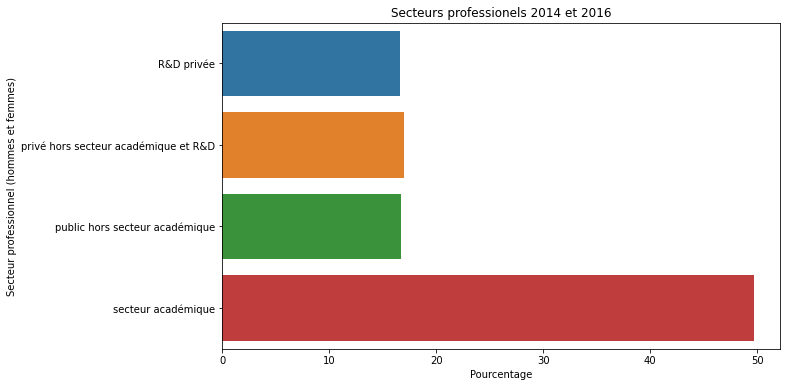

In [1669]:
# Représentation des répartitions dans les différents secteurs professionnel pour l'ensemble des genres
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(
    data=df_graph_secteur, 
    y="secteur", 
    x="%", 
    errorbar=None, 
    ax=ax)

ax.set_title("Secteurs professionels 2014 et 2016")
ax.set_xlabel("Pourcentage")
ax.set_ylabel("Secteur professionnel (hommes et femmes)")
plt.xticks()
plt.show()

In [1670]:
# Selection des secteurs par genre
df_graph_secteur = df_graph_genre.groupby(["Année d’obtention", "secteur", "Genre"])[["%"]].sum() 

In [1671]:
df_graph_secteur.reset_index(inplace=True)

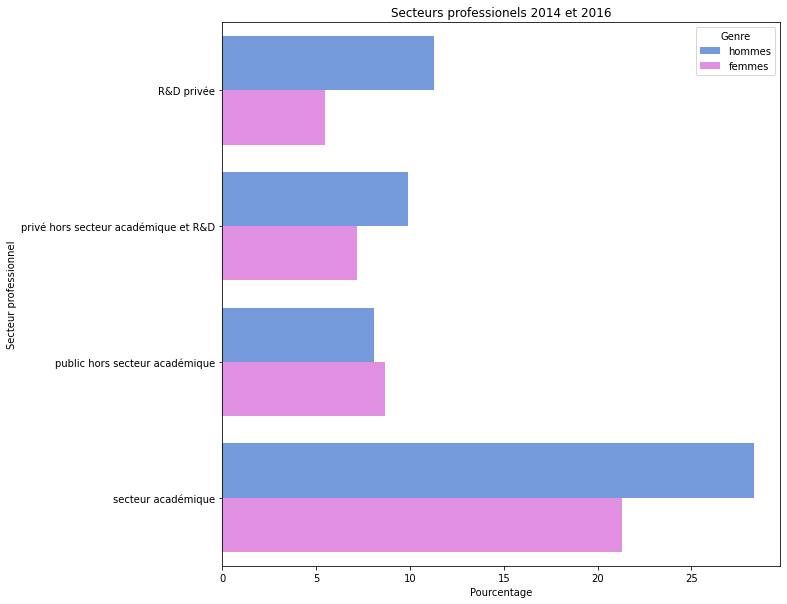

In [1672]:
# Représentation des répartitions dans les différents secteurs professionnels par genre
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(
    data=df_graph_secteur, 
    y="secteur", 
    x="%", 
    hue="Genre",
    hue_order=["hommes", "femmes"],
    palette=["cornflowerblue", "violet"],
    errorbar=None, 
    ax=ax)

ax.set_title("Secteurs professionels 2014 et 2016")
ax.set_xlabel("Pourcentage")
ax.set_ylabel("Secteur professionnel")
plt.xticks()
plt.show()

In [1673]:
# Ajout des discplines
df_graph_full = df_graph_full.groupby(["Discipline principale", "secteur"])[["%"]].sum()

In [1674]:
df_graph_full.sort_values("secteur", inplace=True)
df_graph_full.reset_index(inplace=True)

In [1675]:
graph_stack_full = df_graph_full.pivot_table(index="secteur", columns="Discipline principale", values="%")

In [1684]:
# Réordonnancement des secteurs par leur valeur maximale
col_order = graph_stack_full.max().sort_values().index

In [1685]:
graph_stack_full[col_order]

Discipline principale,Philosophie et arts,"Sciences sociales, sociologie, démographie",Sciences agronomiques et écologiques,Langues et littératures,Sciences juridiques et politiques,Sciences humaines,"Histoire, géographie","Sciences de la terre et de l’univers, espace",Sciences économiques et de gestion,Mathématiques et leurs interactions,Physique,Sciences pour l’ingénieur,Sciences et TIC,Chimie et sciences des matériaux,Sciences de la société,Sciences humaines et humanités,"Biologie, médecine et santé",Sciences du vivant,Sciences et leurs interactions
secteur,,,,,,,,,,,,,,,,,,,
R&D privée,0.07,0.10,0.43,0.08,0.11,0.24,0.14,0.46,0.31,0.90,1.90,3.20,3.30,2.87,0.49,0.57,2.25,2.64,13.14
privé hors secteur académique et R&D,0.55,0.54,0.41,0.32,1.33,0.92,0.73,0.68,0.85,0.75,1.51,1.99,2.12,1.94,2.70,2.50,2.34,2.75,9.05
public hors secteur académique,1.10,0.94,0.46,2.02,1.36,1.67,1.99,0.58,0.94,0.70,0.70,0.73,0.55,1.00,3.18,6.77,2.12,2.54,4.11
secteur académique,1.19,1.50,1.84,2.07,2.15,2.18,2.27,2.61,2.94,3.01,3.86,3.88,4.41,4.59,6.67,7.71,11.35,13.17,21.96


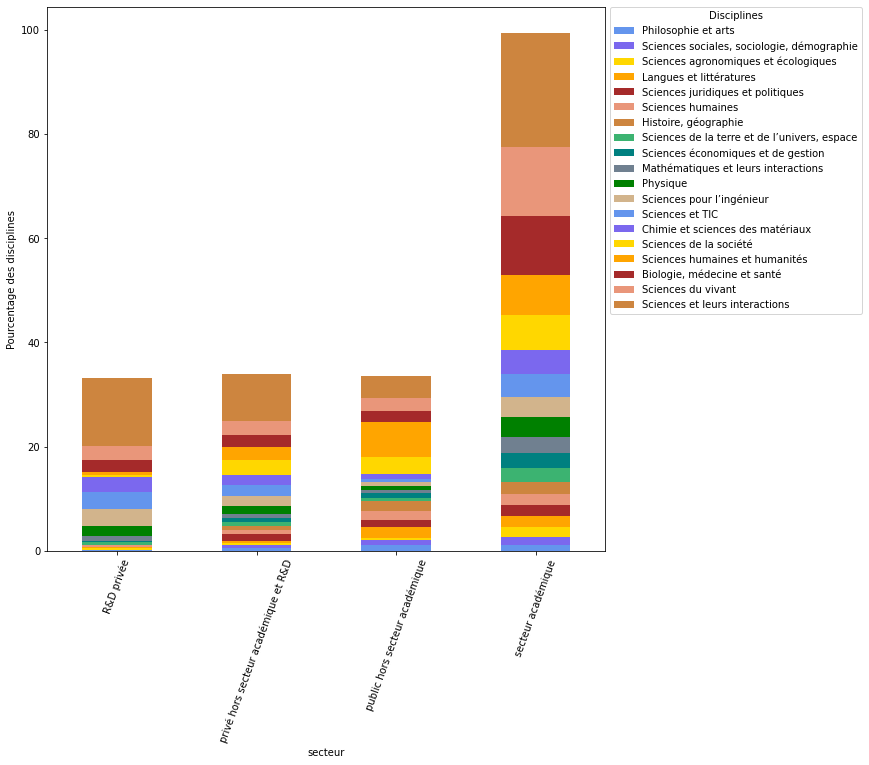

In [1687]:
# Graphique du pourcentage par type de contrats selon l'année
fig, ax = plt.subplots()
graph_stack_full[col_order].plot(
    kind="bar", 
    stacked=True, 
    figsize=(10, 10), 
    ax=ax, 
    color=colors)
plt.legend(title="Disciplines", bbox_to_anchor=(1, 1.01))
plt.xticks(rotation=70)
plt.ylabel("Pourcentage des disciplines")
plt.show()